# Washington University in St. Louis
## RSEC2A - Security Roundtable - 2016 (Held at Knight Center)
**Presented by [Jeff Heaton](http://sites.wustl.edu/jeffheaton)**
September 15, 2016

* Lab Exercises in Developing Predictive Models
* What Are the Creative Pieces of Data That Can Correlate to New and Predictive Questions When Hunting a Threat?


# Required packages

The following imports load the required packages for the entire notebook.

In [6]:
%matplotlib inline

import os
import tensorflow.contrib.learn as skflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing, metrics
from sklearn.cross_validation import train_test_split 
from scipy.stats import zscore

# Configuration Settings

The following settings define the locations of files and a few other things.  If you are trying to run this notebook on your own computer, it might be necessary to change these paths.

In [7]:
IRIS_FILE = "./data/iris.csv"
MPG_FILE = "./data/auto-mpg.csv"
KDD99_FILE = "./data/kdd99_10pct.csv"
ENCODING = "utf-8"

# Reusable Functions

These functions provide needed code for the notebook.  I will not review them, but they can be reused as needed.

In [8]:
def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(filename):
    print()
    print("Analyzing: {}".format(filename))
    df = pd.read_csv(filename,encoding=ENCODING)
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])
            
def encode_categorical(trainDF,name,df):
    one_hot = pd.get_dummies(df[name])
    one_hot.columns = ["{}-{}".format(name,x) for x in one_hot.columns]
    return trainDF.join(one_hot)

# Lab Examples

Beyond this point are the actual lab examples that I will cover.

# DEMO 1 - Iris Dataset Visualization

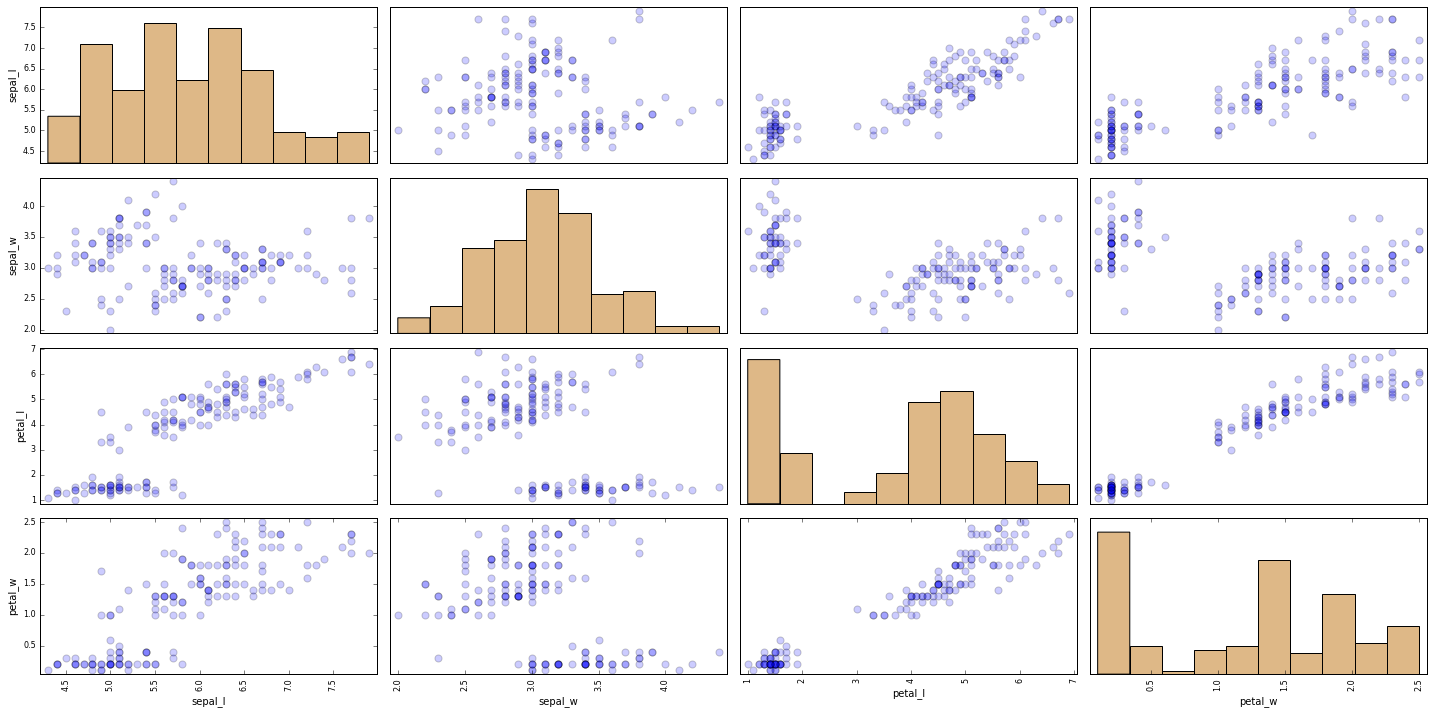

In [9]:
df = pd.read_csv(IRIS_FILE)
axes = pd.tools.plotting.scatter_matrix(df, figsize=(20,10),alpha=0.2,s=200, 
c='blue', hist_kwds={'color':['burlywood']})
plt.tight_layout()
plt.show()

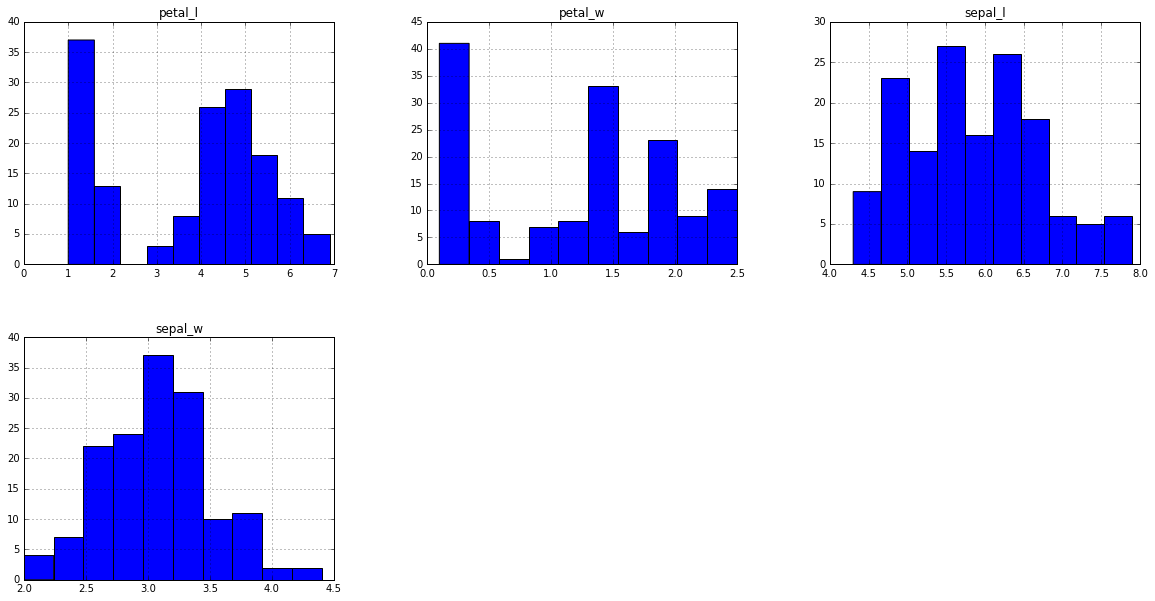

In [10]:
axes = df.hist(layout=(2,3),column=['petal_w', 'petal_l', 'sepal_w','sepal_l'],figsize=(20,10))

# DEMO 2 - Auto MPG Dataset Visualization

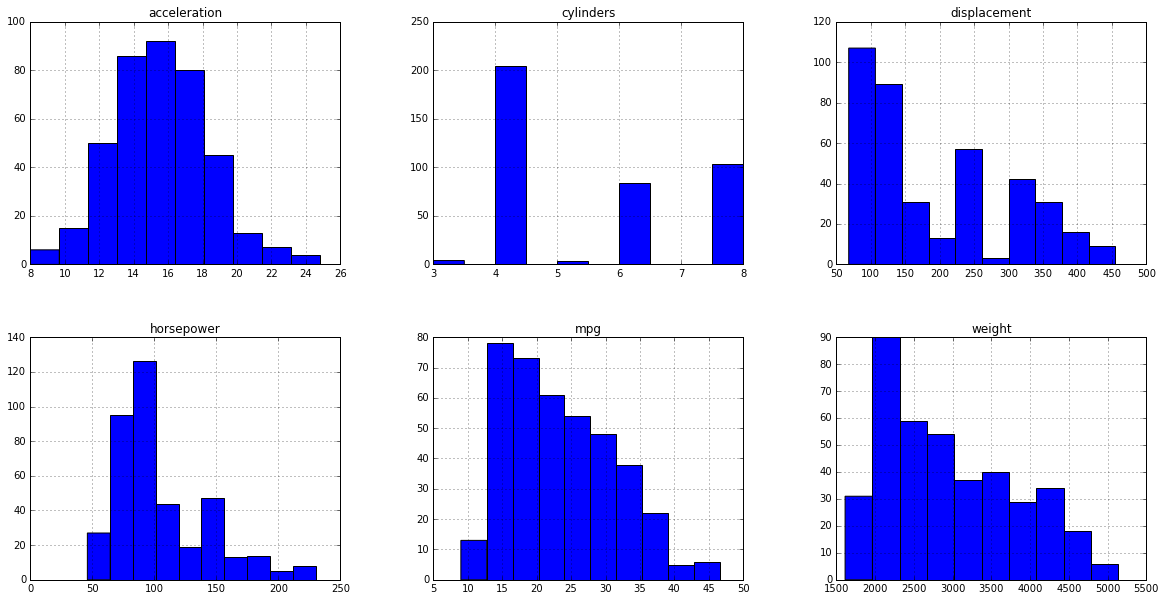

In [11]:
df = pd.read_csv(MPG_FILE,na_values=['NA','?'])
med = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(med)
axes = df.hist(layout=(2,3),column=['mpg', 'cylinders', 'displacement','weight',
                                    'acceleration','horsepower'],figsize=(20,10))

In [12]:
df = pd.read_csv(IRIS_FILE)
x = df.as_matrix(['sepal_l','sepal_w','petal_l','petal_w'])
le = preprocessing.LabelEncoder()
le.fit(df['species'])
y = le.transform(df['species'])

classifier = skflow.TensorFlowDNNClassifier(hidden_units=[10, 20, 10], n_classes=3,steps=200)
classifier.fit(x, y)
score = metrics.accuracy_score(y, classifier.predict(x))
print(score)

print("Tensor Flow Version: {}".format(tf.__version__))

for fv in x:
    print("{} : {}".format(fv,classifier.predict(fv.reshape((1,4)))))

Step #100, epoch #20, avg. train loss: 0.55053
Step #200, epoch #40, avg. train loss: 0.15876
0.946666666667
Tensor Flow Version: 0.8.0
[ 5.1  3.5  1.4  0.2] : [0]
[ 4.9  3.   1.4  0.2] : [0]
[ 4.7  3.2  1.3  0.2] : [0]
[ 4.6  3.1  1.5  0.2] : [0]
[ 5.   3.6  1.4  0.2] : [0]
[ 5.4  3.9  1.7  0.4] : [0]
[ 4.6  3.4  1.4  0.3] : [0]
[ 5.   3.4  1.5  0.2] : [0]
[ 4.4  2.9  1.4  0.2] : [0]
[ 4.9  3.1  1.5  0.1] : [0]
[ 5.4  3.7  1.5  0.2] : [0]
[ 4.8  3.4  1.6  0.2] : [0]
[ 4.8  3.   1.4  0.1] : [0]
[ 4.3  3.   1.1  0.1] : [0]
[ 5.8  4.   1.2  0.2] : [0]
[ 5.7  4.4  1.5  0.4] : [0]
[ 5.4  3.9  1.3  0.4] : [0]
[ 5.1  3.5  1.4  0.3] : [0]
[ 5.7  3.8  1.7  0.3] : [0]
[ 5.1  3.8  1.5  0.3] : [0]
[ 5.4  3.4  1.7  0.2] : [0]
[ 5.1  3.7  1.5  0.4] : [0]
[ 4.6  3.6  1.   0.2] : [0]
[ 5.1  3.3  1.7  0.5] : [0]
[ 4.8  3.4  1.9  0.2] : [0]
[ 5.   3.   1.6  0.2] : [0]
[ 5.   3.4  1.6  0.4] : [0]
[ 5.2  3.5  1.5  0.2] : [0]
[ 5.2  3.4  1.4  0.2] : [0]
[ 4.7  3.2  1.6  0.2] : [0]
[ 4.8  3.1  1.6  0.2] : 

### Auto MPG Modeling

In [13]:
df = pd.read_csv(MPG_FILE,na_values=['NA','?'])

# Handle missing values in horsepower
med = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(med)

df['horsepower'] = zscore(df['horsepower'])
df['weight'] = zscore(df['weight'])
df['cylinders'] = zscore(df['cylinders'])
df['displacement'] = zscore(df['displacement'])
df['acceleration'] = zscore(df['acceleration'])


# Encode to a 2D matrix for training
#x = df.as_matrix(['cylinders','displacement','horsepower','weight','acceleration'])
x = df.as_matrix(['horsepower','weight'])
output_count = x.shape[1]
y = df['mpg']

regressor = skflow.TensorFlowDNNRegressor(hidden_units=[50, 25, 10], steps=5000)
regressor.fit(x, y)
score = np.sqrt(metrics.mean_squared_error(regressor.predict(x),y))
print("Final score (RMSE): {}".format(score))

idx = 0
for fv in x:
    print("{} : {}, actual={}".format(fv,regressor.predict(fv.reshape((1,output_count))),y[idx]))
    idx += 1

Step #100, epoch #7, avg. train loss: 23.32250
Step #200, epoch #15, avg. train loss: 9.30303
Step #300, epoch #23, avg. train loss: 8.37008
Step #400, epoch #30, avg. train loss: 8.15110
Step #500, epoch #38, avg. train loss: 8.10458
Step #600, epoch #46, avg. train loss: 7.80060
Step #700, epoch #53, avg. train loss: 7.87039
Step #800, epoch #61, avg. train loss: 7.77026
Step #900, epoch #69, avg. train loss: 7.78915
Step #1000, epoch #76, avg. train loss: 7.65776
Step #1100, epoch #84, avg. train loss: 7.60247
Step #1200, epoch #92, avg. train loss: 7.62773
Step #1300, epoch #100, avg. train loss: 7.62194
Step #1400, epoch #107, avg. train loss: 7.57693
Step #1500, epoch #115, avg. train loss: 7.28935
Step #1600, epoch #123, avg. train loss: 7.59678
Step #1700, epoch #130, avg. train loss: 7.33390
Step #1800, epoch #138, avg. train loss: 7.32961
Step #1900, epoch #146, avg. train loss: 7.44534
Step #2000, epoch #153, avg. train loss: 7.34388
Step #2100, epoch #161, avg. train loss: 

# DEMO 3 - KDD-99

In [14]:

analyze(KDD99_FILE)



Analyzing: ./data/kdd99_10pct.csv
494021 rows
** duration:2495 (0%)
** protocol_type:[icmp:57.41%,tcp:38.47%,udp:4.12%]
** service:[ecr_i:56.96%,private:22.45%,http:13.01%,smtp:1.97%,other:1.46%,domain_u:1.19%,ftp_data:0.96%,eco_i:0.33%,ftp:0.16%,finger:0.14%,urp_i:0.11%,telnet:0.1%,ntp_u:0.08%,auth:0.07%,pop_3:0.04%,time:0.03%,csnet_ns:0.03%,remote_job:0.02%,gopher:0.02%,imap4:0.02%,domain:0.02%,discard:0.02%,systat:0.02%,iso_tsap:0.02%,echo:0.02%,shell:0.02%,rje:0.02%,sql_net:0.02%,whois:0.02%,printer:0.02%,nntp:0.02%,courier:0.02%,mtp:0.02%,sunrpc:0.02%,netbios_ssn:0.02%,uucp:0.02%,uucp_path:0.02%,klogin:0.02%,vmnet:0.02%,bgp:0.02%,ssh:0.02%,supdup:0.02%,nnsp:0.02%,hostnames:0.02%,login:0.02%,efs:0.02%,daytime:0.02%,netbios_ns:0.02%,link:0.02%,ldap:0.02%,pop_2:0.02%,http_443:0.02%,netbios_dgm:0.02%,exec:0.02%,name:0.02%,kshell:0.02%,ctf:0.02%,netstat:0.02%,Z39_50:0.02%,IRC:0.01%,urh_i:0.0%,X11:0.0%,tim_i:0.0%,tftp_u:0.0%,red_i:0.0%,pm_dump:0.0%]
** flag:[SF:76.6%,S0:17.61%,REJ:5.44

### Feature Importance - KDD-99

Starting...


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   11.9s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.1s finished


Feature ranking:
1. dst_host_same_src_port_rate (0.12019384629502283)
2. service-ecr_i (0.09762008476565157)
3. dst_host_srv_count (0.07939819509301456)
4. count (0.07228743108261428)
5. protocol_type-icmp (0.06606858353799644)
6. same_srv_rate (0.0646669474900672)
7. protocol_type-tcp (0.058390480130236726)
8. srv_count (0.05362882505764802)
9. logged_in (0.04686935911871704)
10. dst_host_srv_serror_rate (0.0408027894938734)
11. flag-SF (0.03920996223393514)
12. service-private (0.033852438397978336)
13. serror_rate (0.032304931307334944)
14. dst_host_same_srv_rate (0.026733755902731568)
15. service-http (0.02567063059075949)
16. srv_serror_rate (0.01769360364946678)
17. dst_host_serror_rate (0.016763843488731434)
18. dst_host_count (0.015048086527265208)
19. flag-S0 (0.01439264457198149)
20. dst_host_srv_rerror_rate (0.010830401846989189)
21. protocol_type-udp (0.008352956149311742)
22. src_bytes (0.0074005999844011195)
23. hot (0.0047779653759401144)
24. dst_host_rerror_rate (0.0047

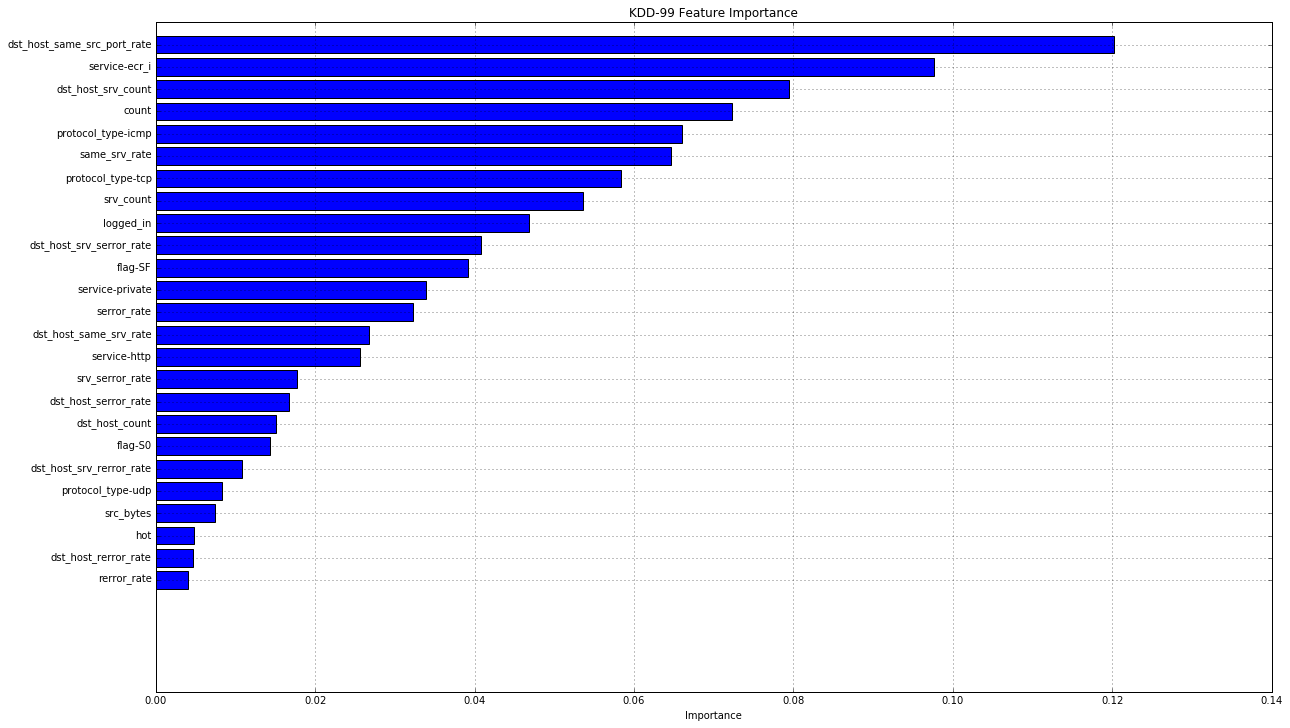

In [15]:
# Feature importance in KDD-99
print("Starting...")
df = pd.read_csv(KDD99_FILE,encoding=ENCODING,na_values=['NA','?'])

df = df.dropna()
trainDF = df[['duration','src_bytes','dst_bytes','land','wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate']]

trainDF = encode_categorical(trainDF,'protocol_type',df)
trainDF = encode_categorical(trainDF,'service',df)
trainDF = encode_categorical(trainDF,'flag',df)

x = trainDF.as_matrix()

le = preprocessing.LabelEncoder()
le.fit(df['outcome'])
y = le.transform(df['outcome'])

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=50,
                              random_state=0, verbose = True)
forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("{}. {} ({})".format(f + 1, trainDF.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
indices = indices[0:min(len(indices),25)] # limit to top 25 features
names = [trainDF.columns[indices[i]] for i in range(len(indices)-1,-1,-1)]

plt.figure(figsize=(20,12))
plt.barh(range(len(indices)-1,-1,-1), importances[indices], align='center')
plt.yticks(range(len(indices)), names)
plt.xlabel('Importance')
plt.title('KDD-99 Feature Importance')
plt.grid(True)
plt.show()




### Predict Security Threat

In [18]:
# Feature importance in KDD-99
print("Starting...")
df = pd.read_csv(KDD99_FILE,encoding=ENCODING,na_values=['NA','?'])

df = df.dropna()
trainDF = df[['duration','src_bytes','dst_bytes','land','wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate']]

trainDF = encode_categorical(trainDF,'protocol_type',df)
trainDF = encode_categorical(trainDF,'service',df)
trainDF = encode_categorical(trainDF,'flag',df)

x = trainDF.as_matrix()

le = preprocessing.LabelEncoder()
le.fit(df['outcome'])
y = le.transform(df['outcome'])

#Train and test split at 25%

x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size=0.25, random_state=42)


# Fit the model to the training dataset
forest = ExtraTreesClassifier(n_estimators=50,
                              random_state=0, verbose = True)
forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred, normalize=True)))



Starting...


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   36.1s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.7s finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.5s finished


Accuracy: 0.9996842258675692


# Generate Graphics for Morning Session

I won't talk about the code below, but it was used to generate some of the graphics for the morning session.  I am placing it here so I don't lose track of it!

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

training = [
    [0,32],
    [10,50],
    [20,68],
    [30,86],
    [40,104]
]

def score(w):
    result = 0
    for row in training:
        f, c = row
        y = (w[0]*f)+w[1]
        result += np.abs(y-c)
        
    return result
        
cells = 10
column_labels = []
row_labels = []
    
grid = np.zeros((cells,cells))
for w1 in range(0,cells):
    w1_value = w1*(5.0/cells)
    row_labels.append(w1_value)
    for w2 in range(0,cells):
        w2_value = w2*(50.0/cells)
        if len(column_labels)<10: column_labels.append(w2_value)
        grid[w1][w2] = score([w1_value,w2_value])
        
print(grid)


fig, ax = plt.subplots()
heatmap = ax.pcolor(grid, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(grid.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(grid.shape[1])+0.5, minor=False)

# want a more natural, table-like display
#ax.invert_yaxis()
#ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.show()


x,y = np.meshgrid(np.arange(cells),np.arange(cells))
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.gca(projection = '3d')
wiref = ax.plot_wireframe(x, y, grid)
 
ax.view_init(elev=60, azim=50)
ax.dist=8 
plt.show()
